<a href="https://colab.research.google.com/github/neovdn/all-projects/blob/master/Tugas_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mengimpor library penting seperti pandas, numpy, sklearn, dan matplotlib untuk pengolahan data, modeling, dan visualisasi. Dataset Train_data.csv dan test_data.csv dimuat dari Kaggle, dengan kolom Unnamed: 0 dihapus dari data test untuk menjaga konsistensi.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

Menggabungkan data train dan test untuk menerapkan encoding kategorikal secara konsisten menggunakan LabelEncoder pada kolom protocol_type, service, dan flag. Setelah encoding, data dipisah kembali menjadi train dan test, lalu fitur (X) dan target (y) dipisahkan untuk masing-masing set.

In [3]:
df_train = pd.read_csv('/Train_data.csv')
df_test = pd.read_csv('/test_data.csv')
df_test = df_test.drop('Unnamed: 0', axis=1)

In [4]:
df_combined = pd.concat([df_train, df_test], axis=0)

# Encode categorical features
le = LabelEncoder()
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    df_combined[col] = le.fit_transform(df_combined[col])

# Split back into train and test
df_train = df_combined.iloc[:len(df_train)]
df_test = df_combined.iloc[len(df_train):]

# Separate features and target
X_train = df_train.drop('xAttack', axis=1)
y_train = df_train['xAttack']
X_test = df_test.drop('xAttack', axis=1)
y_test = df_test['xAttack']

Melatih RandomForestClassifier untuk menghitung skor pentingnya fitur, lalu memilih 15 fitur teratas berdasarkan feature_importances_. Data train dan test dibatasi pada fitur terpilih untuk efisiensi, dan daftar fitur yang dipilih dicetak untuk transparansi.

In [5]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

# Select top 15 features based on importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
top_features = feature_importance.nlargest(15, 'importance')['feature'].tolist()
X_train = X_train[top_features]
X_test = X_test[top_features]

print("Selected Features:", top_features)

Selected Features: ['src_bytes', 'dst_bytes', 'diff_srv_rate', 'same_srv_rate', 'dst_host_serror_rate', 'count', 'srv_serror_rate', 'dst_host_same_src_port_rate', 'serror_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_srv_serror_rate', 'service', 'srv_count', 'dst_host_srv_diff_host_rate']


Mendefinisikan dua model ensemble, RandomForestClassifier dan GradientBoostingClassifier, masing-masing dengan 50 estimator untuk pelatihan cepat. Model dilatih pada fitur terpilih, dievaluasi pada data test menggunakan accuracy_score, dan akurasi masing-masing model dicetak.

In [6]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=50, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=50, random_state=42, loss='log_loss')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.3f}")

RandomForest Accuracy: 0.758
GradientBoosting Accuracy: 0.756


Membuat bar plot dengan matplotlib untuk membandingkan akurasi kedua model, dilengkapi dengan judul, label sumbu, grid, dan batas sumbu untuk visualisasi yang jelas dan informatif.

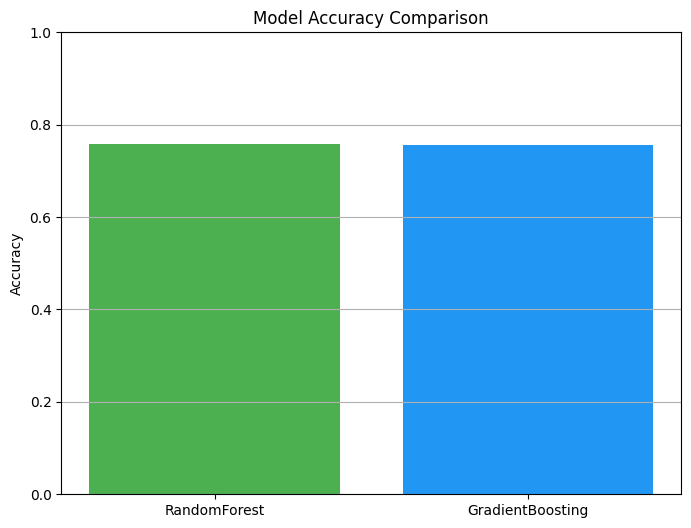

In [7]:
import matplotlib.pyplot as plt

# Plot model accuracies
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color=['#4CAF50', '#2196F3'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()